# Cab Fare Prediction
Problem Statement - You are a cab rental start-up company. 
You have successfully run the pilot project and now want to launch your cab service across the country. 
You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. 
You need to design a system that predicts the fare amount for a cab ride in the city.

In [1]:
# Loading required libraries
import pandas as pd  ## Importing pandas for EDA
import os  ## to get access to input output files
import numpy as np  ## Importing numpy for numerical operations
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt  # for visualization
from sklearn.model_selection import train_test_split  # to split the data into train and test
from sklearn.model_selection import cross_val_score  # to cross validate the model
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 
import math
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
%matplotlib inline

In [2]:
# setting working directory
os.chdir("C:/Users/Radhika/Desktop")

In [3]:
# loading the data
train = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")

# Understanding the data using descriptive statistics

In [4]:
train.head()  # checking the 1st few rows of data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
train.tail()  # checking the last few rows of data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [6]:
train.describe()  #getting the stats details

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [8]:
train.shape

(16067, 7)

In [9]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [10]:
test.shape

(9914, 6)

# Data Wrangling
1. Converting the data types
2. Missing Value Analysis
3. Outlier Analysis
4. Feature Scaling

In [11]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [13]:
# converting the data types
train['fare_amount'] = pd.to_numeric(train['fare_amount'], errors = 'coerce')
train['passenger_count'] = pd.to_numeric(train['passenger_count'], errors = 'coerce')

In [14]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [15]:
train['pickup_datetime'].isnull().sum()

0

In [16]:
# checking the missing values in passenger count
train['passenger_count'].isnull().sum()   ### as there are only few missing values, not even 1%, we can drop them.

## even if we impute the missing values with mode method the data will be more biased towards the value 1.

55

In [17]:
train['passenger_count'].mode()

0    1.0
dtype: float64

In [18]:
train['passenger_count'].mean()

2.625069947539345

In [19]:
#dropping the missing values
train.dropna(subset=['passenger_count'], axis = 0, inplace = True)

In [20]:
#checking the missing values after dropping
train['passenger_count'].isnull().sum()

0

In [21]:
# checking missing values in fare amount
train['fare_amount'].isnull().sum() 

# there are few missing values, not even 1%. we are dropping them as its the target variable and it's not good idea to impute.

25

In [22]:
train.dropna(subset=['fare_amount'], axis = 0, inplace = True)

In [23]:
train['fare_amount'].isnull().sum()

0

In [24]:
# Outlier Analysis - Based on basic understaing of the data we find outlier
# longitude ranges from -180 to 180
# latitude ranges from -90 to 90
# so, anything beyond the ranges we drop them.

train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis = 0)

In [25]:
train = train.drop((train[train['pickup_longitude']>180]).index, axis = 0)
train = train.drop((train[train['pickup_longitude']<-180]).index, axis=0)

In [26]:
train = train.drop((train[train['dropoff_latitude']>90]).index, axis =0)
train = train.drop((train[train['dropoff_latitude']<-90]).index, axis=0)

In [27]:
train = train.drop((train[train['dropoff_longitude']>180]).index, axis =0)
train = train.drop((train[train['dropoff_longitude']<-180]).index, axis=0)

In [28]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [29]:
## there are 0's in passenger count, that doesn't make any sense, so, dropping them
train[train['passenger_count']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0.0
566,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0.0
678,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0.0
1160,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0.0
1935,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0.0
2200,8.1,2011-05-23 16:54:19 UTC,-73.988008,40.748303,-74.005185,40.738733,0.0
2425,8.9,2011-11-25 22:47:33 UTC,-73.999900,40.738600,-73.971800,40.746300,0.0
3034,5.7,2011-03-06 12:03:14 UTC,-73.986557,40.745783,-73.994545,40.729995,0.0
3413,7.3,2011-02-28 06:39:16 UTC,-73.973413,40.743708,-73.985220,40.741583,0.0
3481,11.3,2011-11-30 17:23:02 UTC,-73.968100,40.762500,-73.984400,40.760900,0.0


In [30]:
train = train.drop((train[train['passenger_count']==0]).index, axis=0)

In [31]:
train['passenger_count'].sort_values(ascending = True)  # there is 0.12 in passenger count, not valid so, dropping

8862        0.12
9793        1.00
9794        1.00
9795        1.00
9796        1.00
9797        1.00
9798        1.00
9801        1.00
9804        1.00
9806        1.00
9807        1.00
0           1.00
9808        1.00
9809        1.00
9811        1.00
9812        1.00
9814        1.00
9818        1.00
9819        1.00
9820        1.00
9822        1.00
9823        1.00
9792        1.00
9791        1.00
9790        1.00
9789        1.00
9758        1.00
9759        1.00
9761        1.00
9762        1.00
          ...   
9413        6.00
569         6.00
6817        6.00
9668        6.00
4749        6.00
5794        6.00
7967        6.00
3490        6.00
12129       6.00
4241        6.00
7979        6.00
1043       35.00
8631       43.00
1242       43.00
8406       53.00
1007       53.00
8445       58.00
8571       87.00
233       236.00
1107      345.00
386       354.00
263       456.00
8715      531.20
356       535.00
1200      536.00
8506      537.00
971       554.00
8985      557.

In [32]:
#dropping the value 0.12 in passenger count, which is not valid
train = train.drop((train[train['passenger_count']==0.12]).index, axis=0)

In [33]:
# dropping the values more than 6 in passenger count, because the passenger count limits to 6 even if we consider SUV.
train = train.drop((train[train['passenger_count']>6]).index, axis=0)

In [34]:
train['fare_amount'].sort_values(ascending=True)

13032       -3.00
2039        -2.90
2486        -2.50
10002        0.00
2780         0.01
1427         1.14
6632         2.50
12598        2.50
14633        2.50
6703         2.50
11062        2.50
6765         2.50
14574        2.50
4058         2.50
14530        2.50
12567        2.50
9621         2.50
11222        2.50
11153        2.50
4367         2.50
6297         2.50
6276         2.50
6226         2.50
3558         2.50
15257        2.50
10111        2.50
1671         2.50
6007         2.50
15370        2.50
9773         2.50
           ...   
649         66.30
4118        69.70
1494        70.00
15023       73.30
13615       75.00
11019       75.33
10524       75.80
8363        76.00
6668        76.80
2013        77.00
13962       77.15
4013        77.70
2639        79.00
12437       80.75
14519       82.50
4620        85.50
12614       87.00
10077       87.30
9431        88.00
7810        95.00
12915       96.00
12349      104.67
14142      108.00
6630       128.83
1483      

In [35]:
#there are -ve values in fare amount, so dropping values less than 2.5. considering the minimum fare amount is 2.5
train = train.drop((train[train['fare_amount']<2.5]).index, axis=0)

In [36]:
# fare amount has extreme values. the max amount we are considering here are 453, anything beyond that, we are dropping
train = train.drop((train[train['fare_amount']>454]).index, axis=0)

In [37]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,11.377515,-72.474902,39.898729,-72.465151,39.899267,1.649726
std,10.814754,10.538778,6.186797,10.566703,6.186423,1.265870
min,2.500000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992145,40.734945,-73.991181,40.734749,1.000000
50%,8.500000,-73.981696,40.752633,-73.980158,40.753567,1.000000
75%,12.500000,-73.966824,40.767380,-73.963643,40.768026,2.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [38]:
train.shape  ## so after outlier and missing value analysis we lost 16067 - 15581 = 486 observations

(15901, 7)

In [39]:
train['pickup_latitude'].sort_values(ascending=True)

8443    -74.006893
10091   -74.006210
9548    -73.992947
4783    -73.991840
3827    -73.988467
2147    -73.986968
6705    -73.983285
7525    -73.973047
4214      0.000000
542       0.000000
10783     0.000000
9621      0.000000
12598     0.000000
9600      0.000000
3008      0.000000
2722      0.000000
7982      0.000000
13367     0.000000
3537      0.000000
5212      0.000000
3830      0.000000
3433      0.000000
12300     0.000000
13365     0.000000
7078      0.000000
11486     0.000000
14229     0.000000
14233     0.000000
1779      0.000000
2799      0.000000
           ...    
2918     40.839893
4458     40.840073
9960     40.840880
8707     40.841389
6371     40.841428
2107     40.841443
2346     40.841982
9927     40.850190
3587     40.850443
8955     40.852708
1147     40.857380
11463    40.858017
4313     40.865160
11366    40.866375
12934    40.876620
4004     40.876747
3394     40.956018
649      40.993260
1483     41.032490
11187    41.035688
14367    41.366138
3075     41.

In [40]:
sum(train['pickup_longitude']==0)

309

In [41]:
#there are 0's in pickup latitude variable, drop them
train = train.drop((train[train['pickup_latitude']==0]).index, axis=0)

In [42]:
#there are 0's in pickup longitude variable, drop them
train = train.drop((train[train['pickup_longitude']==0]).index, axis=0)

In [43]:
sum(train['dropoff_latitude']==0)

9

In [44]:
#there are values equal to 0 in dropoff latitude so drop them
train = train.drop((train[train['dropoff_latitude']==0]).index, axis=0)

In [45]:
sum(train['dropoff_longitude']==0)

2

In [46]:
#there are 0's in dropoff longitude variable, drop them
train = train.drop((train[train['dropoff_longitude']==0]).index, axis=0)

In [47]:
train['pickup_datetime'].sort_values(ascending=False)

1327                          43
1428     2015-06-30 22:42:39 UTC
12606    2015-06-30 17:59:31 UTC
8203     2015-06-30 06:25:34 UTC
2237     2015-06-29 20:37:21 UTC
5366     2015-06-28 22:01:41 UTC
1289     2015-06-28 19:50:21 UTC
11027    2015-06-28 14:54:35 UTC
687      2015-06-27 22:06:57 UTC
12483    2015-06-27 21:53:29 UTC
13090    2015-06-27 20:52:38 UTC
9415     2015-06-27 19:29:59 UTC
2627     2015-06-27 13:12:00 UTC
4511     2015-06-27 12:20:45 UTC
1167     2015-06-27 02:56:01 UTC
13663    2015-06-27 02:43:11 UTC
10056    2015-06-27 00:21:16 UTC
6030     2015-06-27 00:15:29 UTC
9898     2015-06-26 22:30:48 UTC
7461     2015-06-26 17:43:02 UTC
6710     2015-06-26 12:42:44 UTC
2273     2015-06-26 07:03:51 UTC
1878     2015-06-26 06:54:20 UTC
1915     2015-06-26 04:00:58 UTC
7887     2015-06-26 00:18:55 UTC
14366    2015-06-25 22:20:18 UTC
8564     2015-06-25 21:35:23 UTC
14690    2015-06-25 18:52:30 UTC
1218     2015-06-25 09:35:23 UTC
2025     2015-06-25 07:48:06 UTC
          

In [48]:
#there is value present which is not in date format, remove that value
train['pickup_datetime'].loc[1327] = np.nan

C:\Users\Radhika\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
train.dropna(subset=['pickup_datetime'], axis = 0, inplace = True)

In [50]:
train['pickup_datetime'].sort_values(ascending=False)

1428     2015-06-30 22:42:39 UTC
12606    2015-06-30 17:59:31 UTC
8203     2015-06-30 06:25:34 UTC
2237     2015-06-29 20:37:21 UTC
5366     2015-06-28 22:01:41 UTC
1289     2015-06-28 19:50:21 UTC
11027    2015-06-28 14:54:35 UTC
687      2015-06-27 22:06:57 UTC
12483    2015-06-27 21:53:29 UTC
13090    2015-06-27 20:52:38 UTC
9415     2015-06-27 19:29:59 UTC
2627     2015-06-27 13:12:00 UTC
4511     2015-06-27 12:20:45 UTC
1167     2015-06-27 02:56:01 UTC
13663    2015-06-27 02:43:11 UTC
10056    2015-06-27 00:21:16 UTC
6030     2015-06-27 00:15:29 UTC
9898     2015-06-26 22:30:48 UTC
7461     2015-06-26 17:43:02 UTC
6710     2015-06-26 12:42:44 UTC
2273     2015-06-26 07:03:51 UTC
1878     2015-06-26 06:54:20 UTC
1915     2015-06-26 04:00:58 UTC
7887     2015-06-26 00:18:55 UTC
14366    2015-06-25 22:20:18 UTC
8564     2015-06-25 21:35:23 UTC
14690    2015-06-25 18:52:30 UTC
1218     2015-06-25 09:35:23 UTC
2025     2015-06-25 07:48:06 UTC
4749     2015-06-25 02:56:25 UTC
          

# Exploratory Data Analysis
1. Visualization - Scatterplot, Histogram Etc
2. Correlation Analysis - VIF, Ch2 test etc

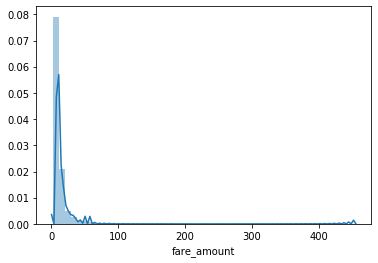

In [51]:
sns.distplot(train['fare_amount'], bins=50)

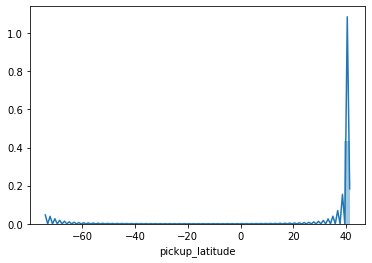

In [52]:
sns.distplot(train['pickup_latitude'], bins=50)

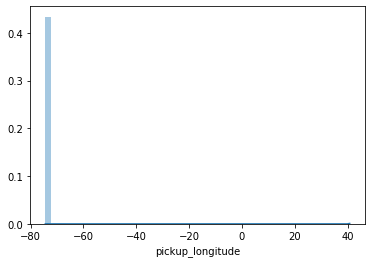

In [53]:
sns.distplot(train['pickup_longitude'], bins =50)

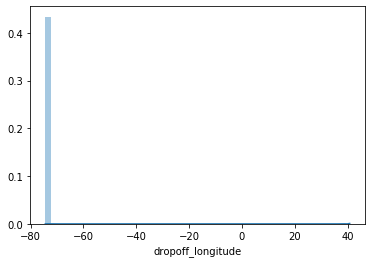

In [54]:
sns.distplot(train['dropoff_longitude'], bins =50)

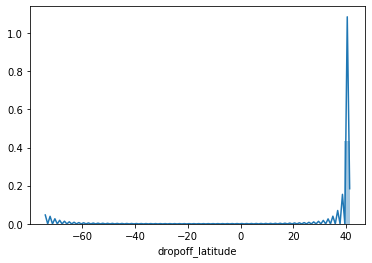

In [55]:
sns.distplot(train['dropoff_latitude'], bins=50)

(0, 475.5364366729679)

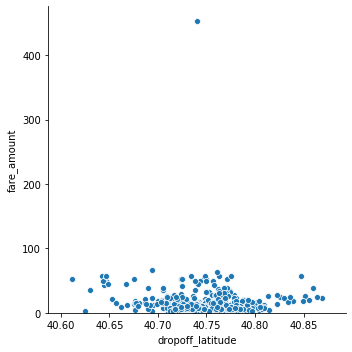

In [56]:
sns.relplot(x = 'dropoff_latitude', y = 'fare_amount', data = train[:900])
plt.ylim(0,)

(0, 475.5364366729679)

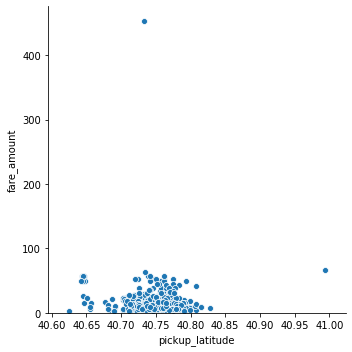

In [57]:
sns.relplot(x = 'pickup_latitude', y = 'fare_amount', data = train[:900])
plt.ylim(0,)

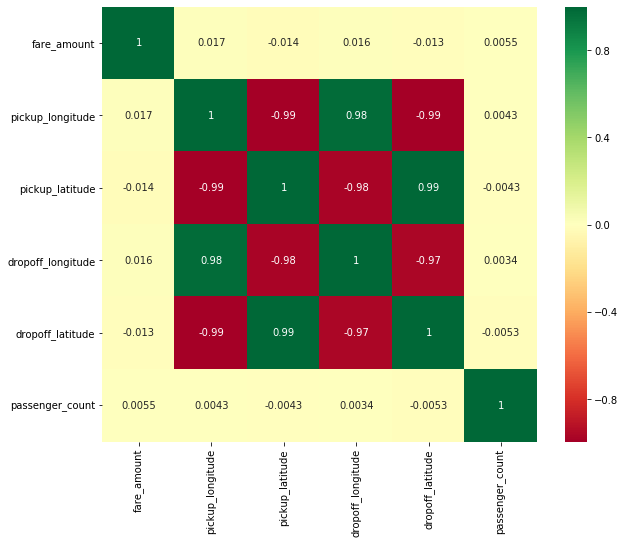

In [58]:
# Correlation plot for checking the correlation between the variables
plt.figure(figsize = (10,8))
sns.heatmap(train.corr(),square=True,cmap='RdYlGn',annot=True)

In [ ]:
#Chisquare test of independence
#Save categorical variables
#cat_names = ["passenger_count"]

In [59]:
#loop for chi square values
#for i in cat_names:
    #print(i)
chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['fare_amount'], train['passenger_count']))
print(p)   # they are correlated to each other

0.9999999846598197


# Feature Engineering
1. Deriving the new variables from pickup_datetime variable.
2. One-hot-encoding
3. Dropping the variables which are not useful for the model

In [60]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [61]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [62]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


In [63]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [64]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [65]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [66]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


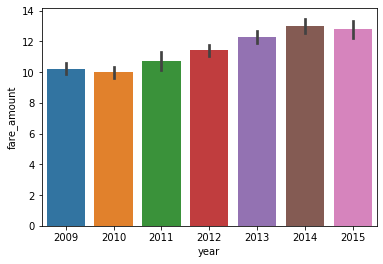

In [67]:
# relation between year and fare amount
sns.barplot(x = 'year', y = 'fare_amount', data = train)

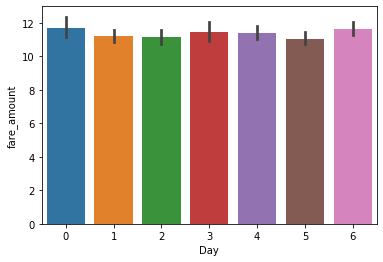

In [68]:
# Relation between day of the week and fare amount
sns.barplot(x = 'Day', y = 'fare_amount', data = train)

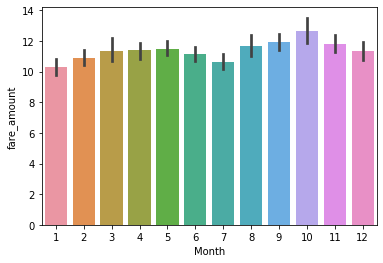

In [69]:
# Relation between month and fare amount
sns.barplot(x = 'Month', y = 'fare_amount', data = train)

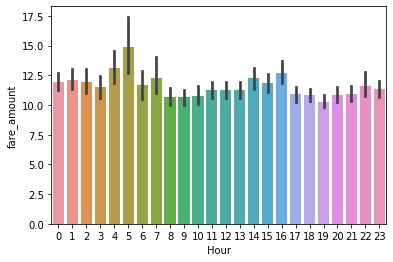

In [70]:
# Relation between hour in a day and fare amount
sns.barplot(x = 'Hour', y = 'fare_amount', data = train)

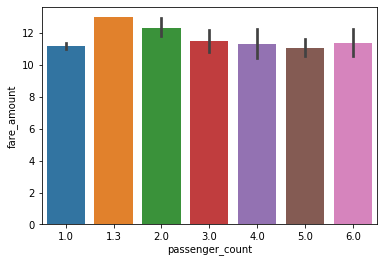

In [71]:
# Relation between passenger count and fare amount
sns.barplot(x = 'passenger_count', y = 'fare_amount', data = train)

(0, 475.5364366729679)

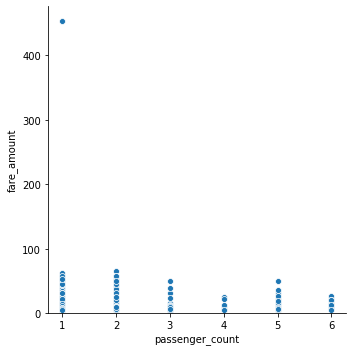

In [72]:
sns.relplot(x = 'passenger_count', y = 'fare_amount', data = train[:800])
plt.ylim(0,)

In [73]:
# function to extract sessions in a day using hour column
def f(x):
    if (x >=5) and (x <= 11):
        return 'morning'
    elif (x >=12) and (x <=16 ):
        return 'afternoon'
    elif (x >= 17) and (x <= 20):
        return'evening'
    elif (x >=21) and (x <= 23) :
        return 'night_PM'
    elif (x >=0) and (x <=4):
        return'night_AM'

In [74]:
# function for extraction seasons in a year using month column
def g(x):
    if (x >=3) and (x <= 5):
        return 'spring'
    elif (x >=6) and (x <=8 ):
        return 'summer'
    elif (x >= 9) and (x <= 11):
        return'fall'
    elif (x >=12)|(x <= 2) :
        return 'winter'

In [75]:
# function to extract for a weekday/weekend
def h(x):
    if (x >=0) and (x <= 4):
        return 'weekday'
    elif (x >=5) and (x <=6 ):
        return 'weekend'

In [76]:
#applying the function for Hour variable
train['session'] = train['Hour'].apply(f)
test['session'] = test['Hour'].apply(f)

In [77]:
# applying function for month variable
train['seasons'] = train['Month'].apply(g)
test['seasons'] = test['Month'].apply(g)

In [78]:
# applying function for weekday/weekend variable
train['week'] = train['Day'].apply(h)
test['week'] = test['Day'].apply(h)

In [79]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,session,seasons,week
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,evening,summer,weekday
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,afternoon,winter,weekday
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,night_AM,summer,weekday
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,night_AM,spring,weekend
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,morning,spring,weekday


In [80]:
# drop the variables Month, Day, Hour, Minute (it doesn't give any value)
train = train.drop(['Month', 'Day', 'Hour', 'Minute', 'pickup_datetime', 'Date'], axis = 1)

In [81]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,session,seasons,week
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,evening,summer,weekday
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,afternoon,winter,weekday
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,night_AM,summer,weekday
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,night_AM,spring,weekend
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,morning,spring,weekday


In [82]:
# drop the variables Month, Day, Hour, Minute (it doesn't give any value)
test = test.drop(['Month', 'Day', 'Hour', 'Minute', 'pickup_datetime', 'Date'], axis = 1)

In [83]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,session,seasons,week
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,afternoon,winter,weekday
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,afternoon,winter,weekday
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,morning,fall,weekend
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,night_PM,winter,weekend
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,night_PM,winter,weekend


In [84]:
#Creating dummies for each variable in passenger_count and merging dummies dataframe to both train and test dataframe
temp = pd.get_dummies(train['passenger_count'], prefix = 'passenger_count')
train = train.join(temp)
temp = pd.get_dummies(test['passenger_count'], prefix = 'passenger_count')
test = test.join(temp)
temp = pd.get_dummies(train['seasons'], prefix = 'season')
train = train.join(temp)
temp = pd.get_dummies(test['seasons'], prefix = 'season')
test = test.join(temp)
temp = pd.get_dummies(train['week'], prefix = 'week')
train = train.join(temp)
temp = pd.get_dummies(test['week'], prefix = 'week')
test = test.join(temp)
temp = pd.get_dummies(train['session'], prefix = 'session')
train = train.join(temp)
temp = pd.get_dummies(test['session'], prefix = 'session')
test = test.join(temp)
temp = pd.get_dummies(train['year'], prefix = 'year')
train = train.join(temp)
temp = pd.get_dummies(test['year'], prefix = 'year')
test = test.join(temp)

In [85]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,session,seasons,week,...,session_morning,session_night_AM,session_night_PM,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,evening,summer,weekday,...,0,0,0,1,0,0,0,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,afternoon,winter,weekday,...,0,0,0,0,1,0,0,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,night_AM,summer,weekday,...,0,1,0,0,0,1,0,0,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,night_AM,spring,weekend,...,0,1,0,0,0,0,1,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,morning,spring,weekday,...,1,0,0,0,1,0,0,0,0,0


In [86]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'session', 'seasons', 'week', 'passenger_count_1.0',
       'passenger_count_1.3', 'passenger_count_2.0', 'passenger_count_3.0',
       'passenger_count_4.0', 'passenger_count_5.0', 'passenger_count_6.0',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'week_weekday', 'week_weekend', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015'],
      dtype='object')

In [87]:
# removing the duplicate variables
train = train.drop(['passenger_count', 'year', 'session', 'seasons', 'week', 'passenger_count_1.3' ], axis = 1)

In [88]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'session', 'seasons',
       'week', 'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'week_weekday', 'week_weekend', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015'],
      dtype='object')

In [89]:
# removing the duplicate variables
test = test.drop(['passenger_count', 'year', 'session', 'seasons', 'week'], axis = 1)

In [90]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'week_weekday', 'week_weekend', 'session_afternoon',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015'],
      dtype='object')

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, 
λ is longitude, R is earth’s radius (mean radius = 6,371km) 
to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [91]:
# we have longitude, latitude so we can calculate distance using Haversine formula

from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    ## Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [92]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [93]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [94]:
# dropping variable latitute and longitude for both pickup and dropoff
train = train.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)

In [95]:
# dropping variable latitute and longitude for both pickup and dropoff
test = test.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)

In [96]:
train.isnull().sum()

fare_amount            0
passenger_count_1.0    0
passenger_count_2.0    0
passenger_count_3.0    0
passenger_count_4.0    0
passenger_count_5.0    0
passenger_count_6.0    0
season_fall            0
season_spring          0
season_summer          0
season_winter          0
week_weekday           0
week_weekend           0
session_afternoon      0
session_evening        0
session_morning        0
session_night_AM       0
session_night_PM       0
year_2009              0
year_2010              0
year_2011              0
year_2012              0
year_2013              0
year_2014              0
year_2015              0
distance               0
dtype: int64

In [97]:
train.dtypes

fare_amount            float64
passenger_count_1.0      uint8
passenger_count_2.0      uint8
passenger_count_3.0      uint8
passenger_count_4.0      uint8
passenger_count_5.0      uint8
passenger_count_6.0      uint8
season_fall              uint8
season_spring            uint8
season_summer            uint8
season_winter            uint8
week_weekday             uint8
week_weekend             uint8
session_afternoon        uint8
session_evening          uint8
session_morning          uint8
session_night_AM         uint8
session_night_PM         uint8
year_2009                uint8
year_2010                uint8
year_2011                uint8
year_2012                uint8
year_2013                uint8
year_2014                uint8
year_2015                uint8
distance               float64
dtype: object

In [98]:
test.dtypes

passenger_count_1      uint8
passenger_count_2      uint8
passenger_count_3      uint8
passenger_count_4      uint8
passenger_count_5      uint8
passenger_count_6      uint8
season_fall            uint8
season_spring          uint8
season_summer          uint8
season_winter          uint8
week_weekday           uint8
week_weekend           uint8
session_afternoon      uint8
session_evening        uint8
session_morning        uint8
session_night_AM       uint8
session_night_PM       uint8
year_2009              uint8
year_2010              uint8
year_2011              uint8
year_2012              uint8
year_2013              uint8
year_2014              uint8
year_2015              uint8
distance             float64
dtype: object

In [99]:
train.shape, test.shape

((15580, 26), (9914, 25))

In [100]:
train['distance'].sort_values(ascending = True)

8068        0.000000
1222        0.000000
1214        0.000000
10485       0.000000
10524       0.000000
10582       0.000000
15393       0.000000
10648       0.000000
10688       0.000000
15371       0.000000
10705       0.000000
10766       0.000000
1124        0.000000
10901       0.000000
10959       0.000000
11137       0.000000
11281       0.000000
11313       0.000000
1245        0.000000
10305       0.000000
1265        0.000000
10212       0.000000
8711        0.000000
8834        0.000000
105         0.000000
9177        0.000000
9208        0.000000
9386        0.000000
270         0.000000
9510        0.000000
            ...     
13804      23.077267
12941      23.114168
4299       23.168706
3216       23.184092
4268       23.196680
12433      23.513721
14099      23.696200
15178      23.814940
15023      24.125745
8105       24.690884
4567       25.735917
6677       26.369072
7021       29.478280
4118       32.602535
6308       37.812945
649        39.476975
12349      43

As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance they have travelled Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some outliers We need to remove these values 

In [101]:
sum(train['distance']==0)

155

In [102]:
sum(test['distance']==0)

85

In [103]:
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15425, 26)

In [104]:
test = test.drop(test[test['distance']== 0].index, axis=0)
test.shape

(9829, 25)

In [105]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15423, 26)

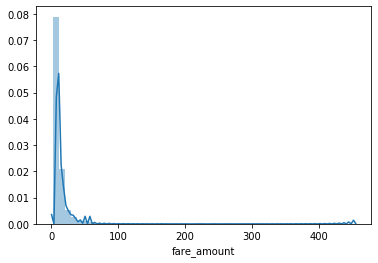

In [106]:
#check the distribution of fare_amount
sns.distplot(train['fare_amount'])

data is not normally distributed so, we apply normalization method for feature scaling

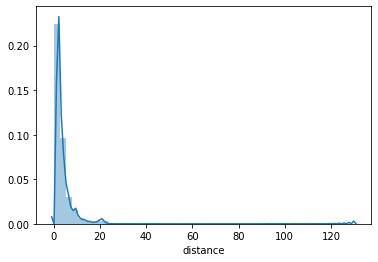

In [107]:
#check the distribution of distance
sns.distplot(train['distance'])

In [108]:
train['distance']

0         1.030764
1         8.450134
2         1.389525
3         2.799270
4         1.999157
5         3.787239
6         1.555807
7         4.155444
9         2.849627
10        1.374577
12        0.717767
13        2.019384
14        1.671445
16        2.609774
17        1.511904
18        0.921952
19        0.399179
20        1.686861
21        2.292470
22        0.924296
23        1.403958
24        1.017773
25        2.531947
27        0.328771
28        4.073463
29        0.808153
30        0.871913
32        9.403296
33        1.381589
34        7.150503
           ...    
16035     2.236055
16036     3.758805
16037     1.711032
16038     2.941770
16039     1.981039
16040     1.456346
16041     3.253381
16042     2.546337
16043     1.755990
16044     3.105214
16045     1.442334
16046     1.756779
16047     0.780375
16048     3.713784
16049     4.806617
16050     1.886438
16051     3.756046
16052     1.432945
16053     0.881922
16054     1.431465
16055    14.022308
16057     1.

Data is not normally distributed

In [109]:
#Feature Scaling for distance
#Normalization
train['distance'] = (train['distance'] - min(train['distance']))/(max(train['distance']) - min(train['distance']))
test['distance'] = (test['distance'] - min(test['distance']))/(max(test['distance']) - min(test['distance']))

In [110]:
train.head()

,fare_amount,passenger_count_1.0,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,season_fall,season_spring,season_summer,...,session_night_AM,session_night_PM,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,distance
0,4.5,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.007931
1,16.9,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.065025
2,5.7,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0.010692
3,7.7,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0.021540
4,5.3,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.015383


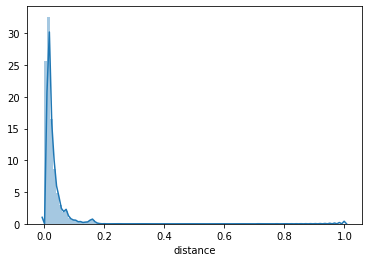

In [111]:
sns.distplot( train['distance'], bins = 100)

# Model Building
1. Train test split
2. Model Building - Linear Regression, Decision Tree, Random Forest, Gradient Boosting

In [112]:
# Splitting the data into train and test, test data for validation
x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [113]:
x_train.shape, x_test.shape

((12338, 25), (3085, 25))

# Linear Regression

In [114]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(x_train , y_train)

In [115]:
#prediction on train data
pred_train_LR = fit_LR.predict(x_train)

In [116]:
#prediction on test data
pred_test_LR = fit_LR.predict(x_test)

In [117]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [118]:
print("RMSE For Training data = "+str(RMSE_train_LR))
print("RMSE For Test data = "+str(RMSE_test_LR))

RMSE For Training data = 8.704386998641535
RMSE For Test data = 6.852617861837847


In [119]:
#calculate R^2 for train data
r2_score(y_train, pred_train_LR)

0.378340027126981

In [120]:
r2_score(y_test, pred_test_LR)

0.4282634262095012

In [121]:
# cross validation
scores = cross_val_score(fit_LR, x_test, y_test, cv =3)
np.mean(scores)

0.3979735334610808

# Decision Tree

In [123]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(x_train, y_train)

In [124]:
#prediction on train data
pred_train_DT = fit_DT.predict(x_train)

#prediction on test data
pred_test_DT = fit_DT.predict(x_test)

In [125]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [126]:
print("RMSE For Training data = "+str(RMSE_train_DT))
print("RMSE For Test data = "+str(RMSE_test_DT))

RMSE For Training data = 7.537891990921912
RMSE For Test data = 4.884460986858321


In [127]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.5337956275160372

In [128]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7095199991272036

# Random Forest

In [130]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [131]:
#prediction on train data
pred_train_RF = fit_RF.predict(x_train)
#prediction on test data
pred_test_RF = fit_RF.predict(x_test)

In [132]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [133]:
print("RMSE For Training data = "+str(RMSE_train_RF))
print("RMSE For Test data = "+str(RMSE_test_RF))

RMSE For Training data = 2.837569511357269
RMSE For Test data = 6.052644160816422


In [134]:
## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

0.9339352888868933

In [135]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.5539605914512112

# Improving the Model

In [ ]:
# Ridge Regression

In [136]:
#RidgeModel = Ridge(alpha = 0.1)
#RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [137]:
#yhat = RidgeModel.predict(x_test)

In [138]:
#yhat = RidgeModel.predict(test)

In [ ]:
#calculate R^2 for test data
#r2_score(x_test, yhat)

In [ ]:
##calculating RMSE for test data
#RMSE_test_Ridge = np.sqrt(mean_squared_error(test, yhat))
#RMSE_test_Ridge

In [106]:
# test['predicted_fare'] = yhat

In [109]:
# test.to_csv('test.csv')

# Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
fit_GB = GradientBoostingRegressor().fit(x_train, y_train)

In [145]:
#prediction on train data
pred_train_GB = fit_GB.predict(x_train)

#prediction on test data
pred_test_GB = fit_GB.predict(x_test)

In [146]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [147]:
print("RMSE For Training data = "+str(RMSE_train_GB))
print("RMSE For Test data = "+str(RMSE_test_GB))

RMSE For Training data = 5.666875249960104
RMSE For Test data = 4.548788950197238


In [148]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.7480731121842978

In [149]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.7365101887267536

# Prediction of fare from provided test dataset :
We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using Gradient Boosting

In [150]:
from sklearn.ensemble import GradientBoostingRegressor
fit_GB = GradientBoostingRegressor().fit(x_test, y_test)

In [151]:
test.shape

(9829, 25)

In [152]:
#prediction on test data
pred_test_GB = fit_GB.predict(test)

Gradient Boosting Gives the best result compared to other Models, so saving the results of this model on test data

In [153]:
test['Predicted_fare'] = pred_test_GB

In [154]:
test.head()

,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter,...,session_night_PM,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,distance,Predicted_fare
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0.023219,12.310620
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0.024240,12.639850
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0.006172,4.895304
3,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0.019597,8.247249
4,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0.053861,17.304125
